In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
# calculate the mse loss
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout


training frac parameters

In [2]:

# half_length_low = np.random.uniform(low=200, high=230, size=10000)
# proppant_low = np.random.uniform(low=20, high=40, size=10000)
# fluid_low = np.random.uniform(low=150, high=270, size=10000)

# use gaussian distribution to generate data
half_length_low = np.random.normal(loc=200, scale=5, size=10000)
proppant_low = np.random.normal(loc=20, scale=5, size=10000)
fluid_low = np.random.normal(loc=200, scale=5, size=10000)



# make a dataframe with the data
df_frac_low = pd.DataFrame({'half_length': half_length_low,
                        'proppant': proppant_low,
                        'fluid': fluid_low})

# half_length_high = np.random.uniform(low=230, high=260, size=10000)
# proppant_high = np.random.uniform(low=30, high=60, size=10000)
# fluid_high = np.random.uniform(low=220, high=300, size=10000)

# use gaussian distribution to generate data
half_length_high = np.random.normal(loc=400, scale=5, size=10000)
proppant_high = np.random.normal(loc=40, scale=5, size=10000)
fluid_high = np.random.normal(loc=400, scale=5, size=10000)

# make a dataframe with the data
df_frac_high = pd.DataFrame({'half_length': half_length_high,
                        'proppant': proppant_high,
                        'fluid': fluid_high})
df_frac_high.head()


,half_length,proppant,fluid
0,387.908712,36.284121,405.115964
1,396.660975,34.200556,396.342792
2,400.161019,33.045790,389.235896
3,400.915306,40.235462,399.057016
4,398.541516,40.207849,400.081532


training resevoir parameters

In [3]:
# gross_low = np.random.uniform(low=1, high=15, size=10000)
# net_low = np.random.uniform(low=2, high=14, size=10000)    
# pi_low = np.random.uniform(low=0.1, high=0.7, size=10000)
# perm_low = np.random.uniform(low=0.1, high=0.5, size=10000)
# poro_low = np.random.uniform(low=4, high=9, size=10000)

# use gaussian distribution to generate data
gross_low = np.random.normal(loc=20, scale=2, size=10000)
net_low = np.random.normal(loc=10, scale=2, size=10000)
pi_low = np.random.normal(loc=0.5, scale=0.1, size=10000)
perm_low = np.random.normal(loc=0.5, scale=0.1, size=10000)
poro_low = np.random.normal(loc=5, scale=1, size=10000)


df_res_low = pd.DataFrame({'gross': gross_low,
                        'net': net_low,
                        'pi': pi_low,
                        'perm': perm_low,
                        'poro': poro_low})

# gross_high = np.random.uniform(low=8, high=20, size=10000)
# net_high = np.random.uniform(low=10, high=18, size=10000)
# pi_high = np.random.uniform(low=0.1, high=1, size=10000)
# perm_high = np.random.uniform(low=0.1, high=0.5, size=10000)
# poro_high = np.random.uniform(low=5, high=8, size=10000)\

# use gaussian distribution to generate data
gross_high = np.random.normal(loc=40, scale=2, size=10000)
net_high = np.random.normal(loc=20, scale=2, size=10000)
pi_high = np.random.normal(loc=1, scale=0.1, size=10000)
perm_high = np.random.normal(loc=1, scale=0.1, size=10000)
poro_high = np.random.normal(loc=10, scale=1, size=10000)

df_res_high = pd.DataFrame({'gross': gross_high,
                        'net': net_high,
                        'pi': pi_high,
                        'perm': perm_high,
                        'poro': poro_high})

df_res_high.head()


,gross,net,pi,perm,poro
0,41.901542,16.084133,0.836278,1.002918,11.136119
1,40.512997,23.866110,1.018915,0.945661,9.017579
2,37.151485,20.498276,1.151330,1.014355,8.777263
3,43.427885,17.883644,1.086247,1.001667,7.517955
4,41.493701,23.946942,1.022154,0.990222,8.825297


In [4]:
production_low = np.random.uniform(low=100, high=300, size=10000)
production_high = np.random.uniform(low=300, high=1000, size=10000)

df_prod_low = pd.DataFrame({'production': production_low})
df_prod_high = pd.DataFrame({'production': production_high})

In [5]:
check_low = pd.concat([df_frac_low, df_res_low], axis=1)
check_high = pd.concat([df_frac_high, df_res_high], axis=1)

check_low.head()

,half_length,proppant,fluid,gross,net,pi,perm,poro
0,206.103911,23.758401,205.554102,18.595808,11.185997,0.659420,0.629550,4.419163
1,198.736070,24.809661,192.253157,21.809267,7.687828,0.440140,0.458802,5.380531
2,201.004253,27.272298,203.724091,20.599386,9.147057,0.478592,0.459841,6.005720
3,202.024532,12.556162,202.141420,19.395238,10.186975,0.395291,0.462023,5.375406
4,200.552775,23.558026,210.378965,20.386213,12.364346,0.585913,0.346944,4.904020


Autoencoder

In [6]:

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(check_low)

# Split the normalized data into training and testing sets
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

input_size = X_train.shape[1]
layer_size = input_size  # same as the number of input features

# Input layer
input_layer = Input(shape=(input_size,))

# Encoder layers with dropout for regularization
encoded = Dense(layer_size, activation='relu')(input_layer)
encoded = Dropout(0.1)(encoded)  # Example dropout rate of 10%
encoded = Dense(layer_size, activation='relu')(encoded)
encoded = Dropout(0.1)(encoded)  # Dropout layer
encoded = Dense(layer_size, activation='relu')(encoded)

# Decoder layers
decoded = Dense(layer_size, activation='relu')(encoded)
decoded = Dropout(0.1)(decoded)  # Dropout layer
decoded = Dense(layer_size, activation='relu')(decoded)
decoded = Dropout(0.1)(decoded)  # Dropout layer
decoded = Dense(input_size, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training set
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),  # Add a validation set
                verbose=1)

# Evaluate the model on the test set
test_loss = autoencoder.evaluate(X_test, X_test)
print(f'Test loss (mean squared error): {test_loss}')


Epoch 1/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0174 - val_loss: 0.0164
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.0162
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.0160
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.0159
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0157 - val_loss: 0.0158
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0157
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.0154
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0149
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.0146
Epoch 11/50
32/32 

In [7]:
# Make predictions on the test set
preds = autoencoder.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(X_test, preds)
print(f'Mean squared error: {mse}')


Mean squared error: 0.01276077752431511


In [96]:
# Inverse transform the scaled predictions and the actual test data
predicted_test = scaler.inverse_transform(preds)
actual_test = scaler.inverse_transform(X_test)

# calculate the mse loss
mse_loss = mean_squared_error(actual_test, predicted_test)
print(f'Mean squared error: {mse_loss}')

# Convert the arrays back to DataFrames
predicted_df = pd.DataFrame(predicted_test, columns=check_low.columns)
actual_df = pd.DataFrame(actual_test, columns=check_low.columns)

Mean squared error: 0.7154967959980086


test the model with high production well data

In [98]:
# pick 100 samples randomly from the check_high dataframe
check_high_sample = check_high.sample(n=100, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
df_scaled_high = scaler.fit_transform(check_high_sample)

# Make predictions on the test set
preds_high = autoencoder.predict(df_scaled_high)

# Calculate the mean squared error
mse_high = mean_squared_error(df_scaled_high, preds_high)
print(f'Mean squared error: {mse_high}')

4/4 [==============================] - 0s 0s/step
Mean squared error: 0.027103498362897535


In [99]:
# inverse transform the data
df_scaled_high_inv = scaler.inverse_transform(df_scaled_high)
preds_high_inv = scaler.inverse_transform(preds_high)

# calculate the mean squared error
mse_high_inv = mean_squared_error(df_scaled_high_inv, preds_high_inv)
print(f'Mean squared error: {mse_high_inv}')

# convert the array to dataframe
df_scaled_high_inv = pd.DataFrame(df_scaled_high_inv, columns=check_high_sample.columns)
preds_high_inv = pd.DataFrame(preds_high_inv, columns=check_high_sample.columns)




Mean squared error: 6.87471923851442


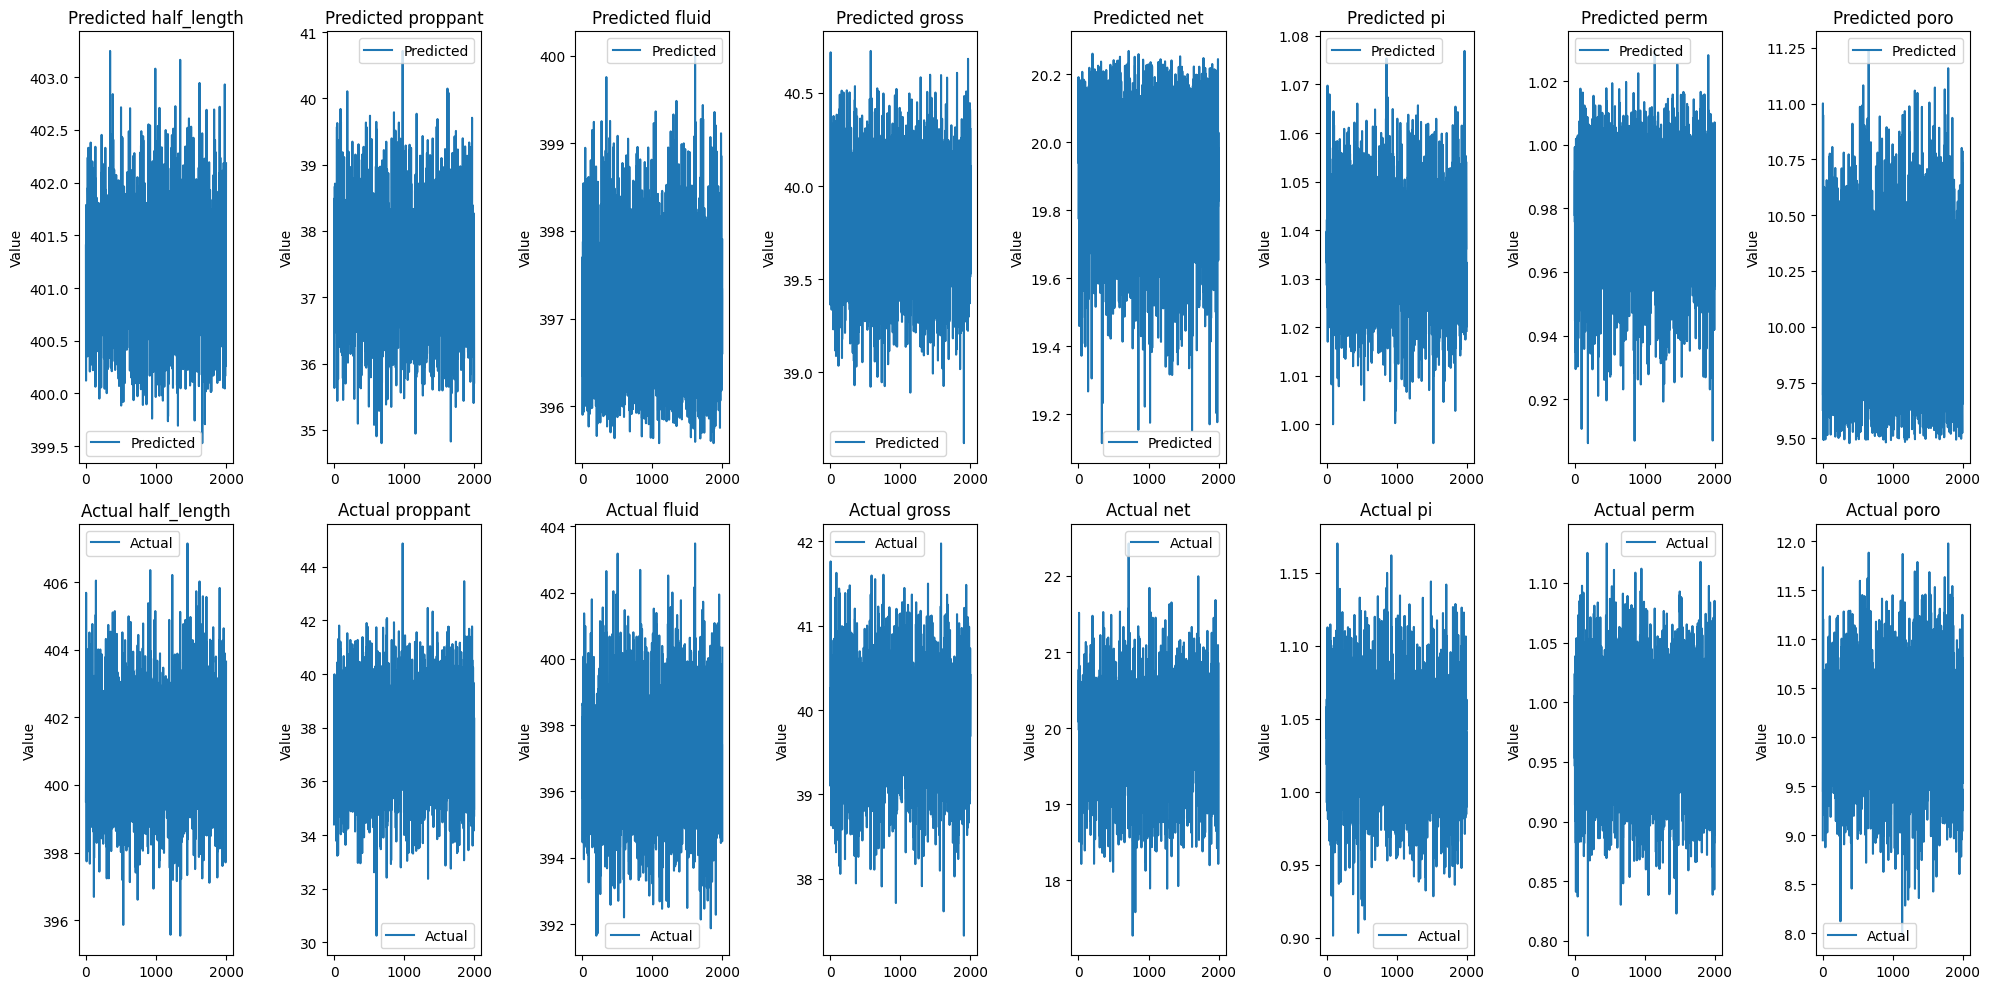

In [97]:

# Adjust ncols to match the number of features in 'check_low'
fig, axes = plt.subplots(nrows=2, ncols=len(check_low.columns), figsize=(20, 10))

for i, col in enumerate(check_low.columns):
    # Plot predicted values
    axes[0, i].plot(predicted_df.index, predicted_df[col], label='Predicted')
    axes[0, i].set_title(f'Predicted {col}')
    axes[0, i].set_ylabel('Value')
    
    # Plot actual values
    axes[1, i].plot(actual_df.index, actual_df[col], label='Actual')
    axes[1, i].set_title(f'Actual {col}')
    axes[1, i].set_ylabel('Value')

# Add legends and improve layout
for ax_row in axes:
    for ax in ax_row:
        ax.legend()

plt.tight_layout()
plt.show()


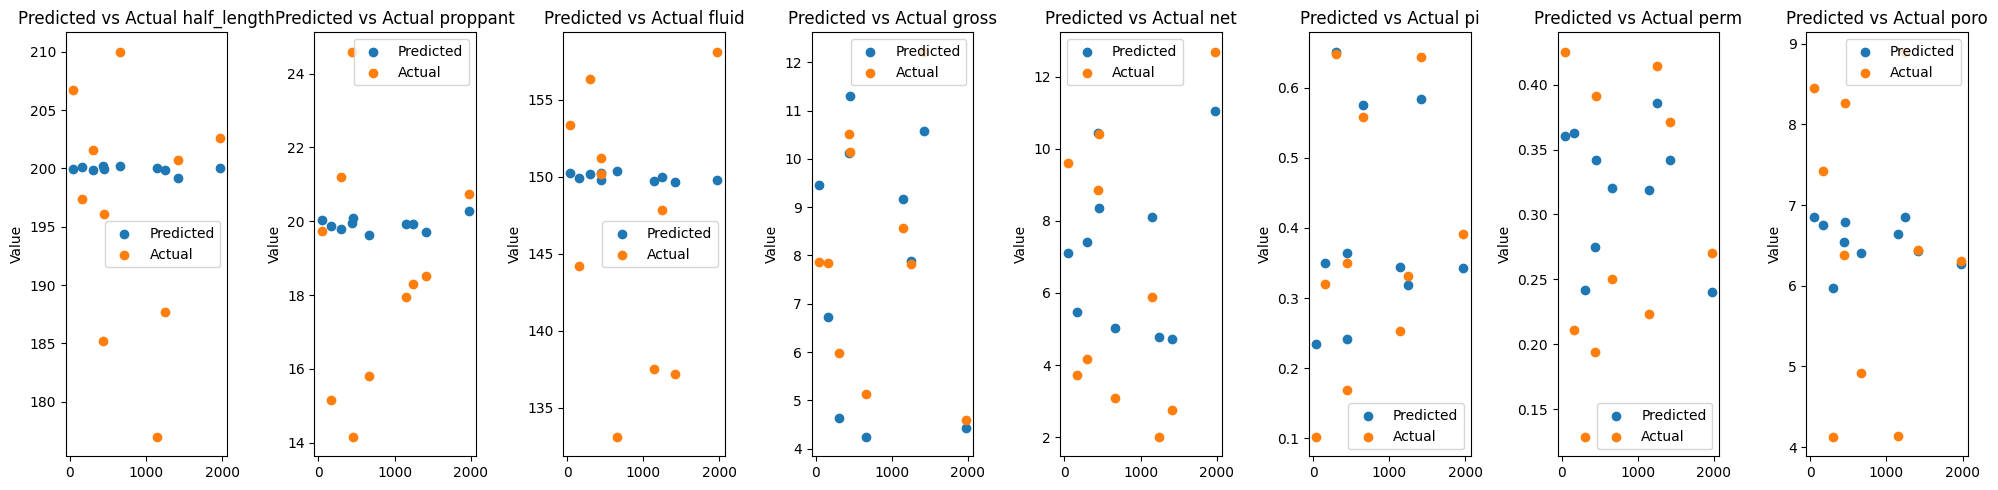

In [71]:
# random pick 10 samples from the test set
random_10 = actual_df.sample(10)
# get the predicted values for the 10 samples
predicted_10 = predicted_df.loc[random_10.index]

# plot the predicted and actual values on the same plot
fig, axes = plt.subplots(nrows=1, ncols=len(check_low.columns), figsize=(20, 5))

for i, col in enumerate(check_low.columns):
    # Plot predicted values
    axes[i].scatter(predicted_10.index, predicted_10[col], label='Predicted')
    axes[i].scatter(random_10.index, random_10[col], label='Actual')
    axes[i].set_title(f'Predicted vs Actual {col}')
    axes[i].set_ylabel('Value')

# Add legends and improve layout
for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()


In [72]:
# calculate the mse loss for the 10 samples
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(random_10, predicted_10)
print(f'Mean squared error: {mse}')

Mean squared error: 25.31855698907206


test with new data

In [74]:
# test data
test_half_length_low = np.random.uniform(low=210, high=230, size=10)
test_proppant_low = np.random.uniform(low=20, high=40, size=10)
test_fluid_low = np.random.uniform(low=150, high=270, size=10)

# make a dataframe with the data
test_df_frac_low = pd.DataFrame({'half_length': test_half_length_low,
                        'proppant': test_proppant_low,
                        'fluid': test_fluid_low})

test_gross_low = np.random.uniform(low=1, high=15, size=10)
test_net_low = np.random.uniform(low=2, high=14, size=10)
test_pi_low = np.random.uniform(low=0.1, high=0.7, size=10)
test_perm_low = np.random.uniform(low=0.1, high=0.5, size=10)
test_poro_low = np.random.uniform(low=4, high=9, size=10)

test_df_res_low = pd.DataFrame({'gross': test_gross_low,
                        'net': test_net_low,
                        'pi': test_pi_low,
                        'perm': test_perm_low,
                        'poro': test_poro_low})

test_check_low = pd.concat([test_df_frac_low, test_df_res_low], axis=1)


In [75]:
# get the mse loss on the test set
scaler = MinMaxScaler()
df_scaled_test = scaler.fit_transform(test_check_low)

# Use the autoencoder to make predictions on the scaled data
predicted_test = autoencoder.predict(df_scaled_test)

# Inverse transform the predicted values to their original scale
predicted_inverse_test = scaler.inverse_transform(predicted_test)

# Create a DataFrame of the reconstructed data
reconstructed_df_test = pd.DataFrame(predicted_inverse_test, columns=test_check_low.columns)

# calculate the mse loss
mse_loss = mean_squared_error(test_check_low, reconstructed_df_test)
print(mse_loss)

1/1 [==============================] - 0s 41ms/step
194.2113660912437


,Original half_length,Reconstructed half_length,Original proppant,Reconstructed proppant,Original fluid,Reconstructed fluid
0,207.687629,207.466217,39.829176,36.101482,187.106681,183.539307
1,220.944633,216.453766,28.949577,24.911516,181.504103,199.157379
2,225.031615,217.330521,34.140880,32.620872,181.303088,223.533783
3,212.323805,208.789459,35.063697,32.561756,182.743477,199.771484
4,201.336123,207.122025,36.868993,36.476013,242.152049,213.131744
